### Matplotlib Annotations

In [635]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [637]:
df["Total foreign born"] 

# borde vara int64 men är object pga "," som markerar tusen

0       7,127
1      17,718
2      30,216
3       2,991
4       3,301
        ...  
156    12,518
157    37,652
158    14,634
159     1,304
160    12,207
Name: Total foreign born, Length: 161, dtype: object

In [638]:
df["Total foreign born"].iloc[0] 

# här kan vi se att talet är en sträng istället för integer,
# vilket kommer ställa till problem om vi vill visualisera datan då vi inte kan visualiserar strängar.

'7,127'

In [639]:
df["Sweden"]

# när vi plockar ut sverige här så får vi ut en serie för Sweden, en dataframe byggs upp av flera serier

0        200
1         65
2        186
3          5
4         32
       ...  
156       45
157    7,542
158      289
159       10
160      343
Name: Sweden, Length: 161, dtype: object

In [640]:
df[["Sweden", "Norway", "Denmark", "Finland"]]

# för att plocka ut flera serier samtidigt så måste vi skicka in detta som en lista: "["Sweden", "Norway", "Denmark", "Finland"]",
# en lista av kolumnerna(serierna) vi vill plocka ut.

# när vi plockar ut flera kolumner på det här sättet så får vi ut en dataframe, när vi bara plockade ut "Sweden" så får vi tillbaka en serie.

,Sweden,Norway,Denmark,Finland
0,200,59,105,1
1,65,12,21,3
2,186,9,15,5
3,5,2,5,NaN
4,32,4,5,3
...,...,...,...,...
156,45,2,3,52
157,"7,542",269,153,"1,143"
158,289,46,81,6
159,10,1,NaN,NaN


In [641]:
df_nordic = df[["Sweden", "Norway", "Denmark", "Finland", "Total foreign born", "State"]]
df_nordic.head()

,Sweden,Norway,Denmark,Finland,Total foreign born,State
0,200,59,105,1,"7,127",Ohio
1,65,12,21,3,"17,718",New York
2,186,9,15,5,"30,216",Pennsylvania
3,5,2,5,NaN,"2,991",Pennsylvania
4,32,4,5,3,"3,301",Pennsylvania


In [642]:
df_nordic = df_nordic.fillna("0")

# här ersätter vi alla "NaN" värden med "0" i "df_nordic"

In [643]:
df_nordic["Sweden"] = df_nordic["Sweden"].str.replace(",","").astype(int)
df_nordic["Norway"] = df_nordic["Norway"].str.replace(",","").astype(int)
df_nordic["Denmark"] = df_nordic["Denmark"].str.replace(",","").astype(int)
df_nordic["Finland"] = df_nordic["Finland"].str.replace(",","").astype(int)
df_nordic["Total foreign born"] = df_nordic["Total foreign born"].str.replace(",","").astype(int)

# här rensar vi ut alla "," så att vi kan visualisera datan korrekt, detta går också att göra med en for-loop

In [644]:
df_nordic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sweden              161 non-null    int64 
 1   Norway              161 non-null    int64 
 2   Denmark             161 non-null    int64 
 3   Finland             161 non-null    int64 
 4   Total foreign born  161 non-null    int64 
 5   State               161 non-null    object
dtypes: int64(5), object(1)
memory usage: 7.7+ KB


In [645]:
duckdb.query("""--sql
    WITH nordic AS (
        SELECT
            state,
            SUM(sweden) AS "Swedish",
            SUM(norway) AS "Norwegian",
            SUM(denmark) AS "Danish",
            SUM(finland) AS "Finnish",
            SUM("Total foreign born") AS "Total Foreigners"
        FROM
            df_nordic
        GROUP BY
            state
        )
    FROM nordic
""").df()

# det vi har gjort ovan kallas för en CTE, denna CTE skapar en temporär tabell som vi kallar "nordic",
# denna tabell kan vi plocka ifrån, när vi har skapat denna och kör "FROM nordic" så får vi fram hela tabellen.

# men vi ska testa en annan sak i nästa exempel:

,State,Swedish,Norwegian,Danish,Finnish,Total Foreigners
0,New Jersey,2750.0,1483.0,1061.0,212.0,258498.0
1,Tennessee,174.0,15.0,42.0,9.0,10036.0
2,Wisconsin,4034.0,6485.0,4024.0,405.0,124230.0
3,New York,29961.0,11752.0,6186.0,3764.0,1521931.0
4,Kentucky,110.0,12.0,37.0,2.0,31755.0
5,Virginia,51.0,40.0,18.0,17.0,4570.0
6,Utah,1687.0,502.0,965.0,8.0,12741.0
7,Maryland,236.0,188.0,107.0,16.0,68600.0
8,Massachusetts,21971.0,2366.0,1451.0,3154.0,567170.0
9,Connecticut,6647.0,273.0,1144.0,41.0,101502.0


In [646]:
duckdb.query("""--sql
    WITH nordic AS (
        SELECT
            state,
            SUM(sweden) AS "Swedish",
            SUM(norway) AS "Norwegian",
            SUM(denmark) AS "Danish",
            SUM(finland) AS "Finnish",
            SUM("Total foreign born") AS "Total Foreigners"
        FROM
            df_nordic
        GROUP BY
            state
        )
    FROM nordic n
        SELECT 
            *, n.swedish + n.norwegian + n.danish + n.finnish AS "Total Nordic"
        ORDER BY
            "Total Nordic" DESC
""").df()

# med hjälp av CTE'n vi skapade tidigare har vi nu alltså skapat en ny kolumn som heter "Nordic" där vi visar total antal
# nordiska invandrare till USA.

# i exemplet ovan sorterar vi även staterna på störst antal Nordiska invandrare totalt.

,State,Swedish,Norwegian,Danish,Finnish,Total Foreigners,Total Nordic
0,Illinois,57158.0,22300.0,10374.0,447.0,627465.0,90279.0
1,Minnesota,34984.0,17087.0,2975.0,1101.0,128823.0,56147.0
2,New York,29961.0,11752.0,6186.0,3764.0,1521931.0,51663.0
3,Massachusetts,21971.0,2366.0,1451.0,3154.0,567170.0,28942.0
4,Wisconsin,4034.0,6485.0,4024.0,405.0,124230.0,14948.0
5,California,7223.0,2729.0,3082.0,986.0,160828.0,14020.0
6,Washington,5150.0,3686.0,1193.0,603.0,40868.0,10632.0
7,Pennsylvania,5986.0,861.0,1210.0,378.0,514506.0,8435.0
8,Nebraska,4864.0,457.0,2888.0,11.0,34456.0,8220.0
9,Connecticut,6647.0,273.0,1144.0,41.0,101502.0,8105.0


In [647]:
df_nordic_total = duckdb.query("""--sql
    WITH nordic AS (
        SELECT
            state,
            SUM(sweden) AS "Swedish",
            SUM(norway) AS "Norwegian",
            SUM(denmark) AS "Danish",
            SUM(finland) AS "Finnish",
            SUM("Total foreign born") AS "Total Foreigners"
        FROM
            df_nordic
        GROUP BY
            state
        )
    FROM nordic n
        SELECT 
            *, n.swedish + n.norwegian + n.danish + n.finnish AS "Total Nordic"
        ORDER BY
            "Total Nordic" DESC
""").df()

df_nordic_total

,State,Swedish,Norwegian,Danish,Finnish,Total Foreigners,Total Nordic
0,Illinois,57158.0,22300.0,10374.0,447.0,627465.0,90279.0
1,Minnesota,34984.0,17087.0,2975.0,1101.0,128823.0,56147.0
2,New York,29961.0,11752.0,6186.0,3764.0,1521931.0,51663.0
3,Massachusetts,21971.0,2366.0,1451.0,3154.0,567170.0,28942.0
4,Wisconsin,4034.0,6485.0,4024.0,405.0,124230.0,14948.0
5,California,7223.0,2729.0,3082.0,986.0,160828.0,14020.0
6,Washington,5150.0,3686.0,1193.0,603.0,40868.0,10632.0
7,Pennsylvania,5986.0,861.0,1210.0,378.0,514506.0,8435.0
8,Nebraska,4864.0,457.0,2888.0,11.0,34456.0,8220.0
9,Connecticut,6647.0,273.0,1144.0,41.0,101502.0,8105.0


In [648]:
df_nordic_total.head()

,State,Swedish,Norwegian,Danish,Finnish,Total Foreigners,Total Nordic
0,Illinois,57158.0,22300.0,10374.0,447.0,627465.0,90279.0
1,Minnesota,34984.0,17087.0,2975.0,1101.0,128823.0,56147.0
2,New York,29961.0,11752.0,6186.0,3764.0,1521931.0,51663.0
3,Massachusetts,21971.0,2366.0,1451.0,3154.0,567170.0,28942.0
4,Wisconsin,4034.0,6485.0,4024.0,405.0,124230.0,14948.0


In [649]:
df_nordic_total.shape

(39, 7)

In [650]:
import matplotlib.pyplot as plt

top_3_nordic = df_nordic_total.drop(["Total Foreigners", "Total Nordic"], axis=1).set_index("State").iloc[:3]

top_3_nordic


,Swedish,Norwegian,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

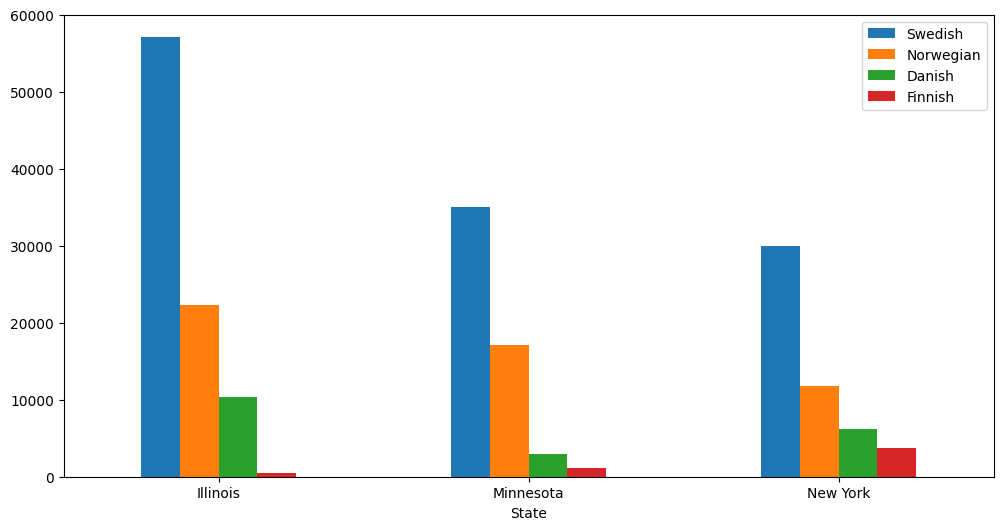

In [661]:
# top 3 nordic plot

def nordic_t3n_plot():
    ax = top_3_nordic.plot(kind="bar", figsize=(12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation=0)

    fig = ax.get_figure()

    return fig, ax

nordic_t3n_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

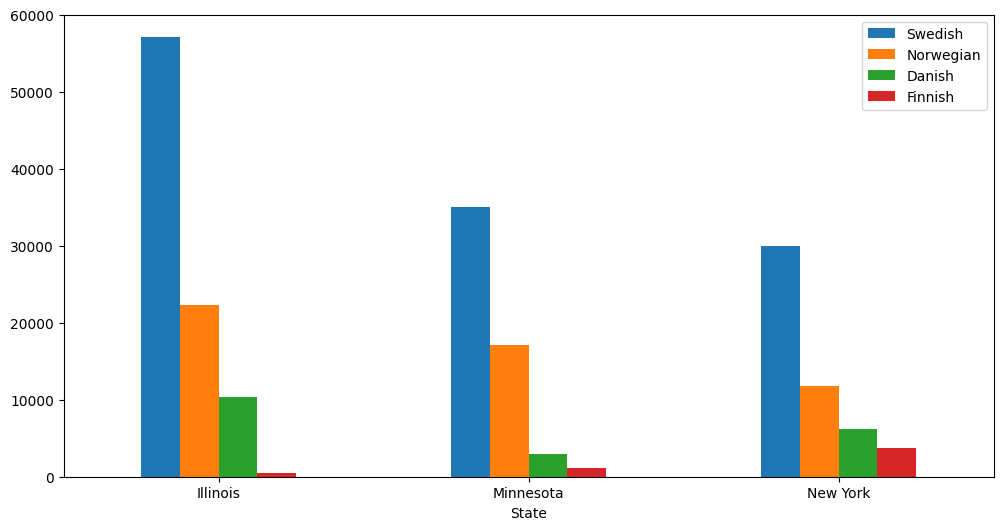

In [663]:
fig, ax = nordic_t3n_plot()

ax.containers

## Annotations

In [664]:
ax.containers[0]

<BarContainer object of 3 artists>

In [665]:
ax.containers[0][0]

Text(0.77, 41000, 'Swedish')

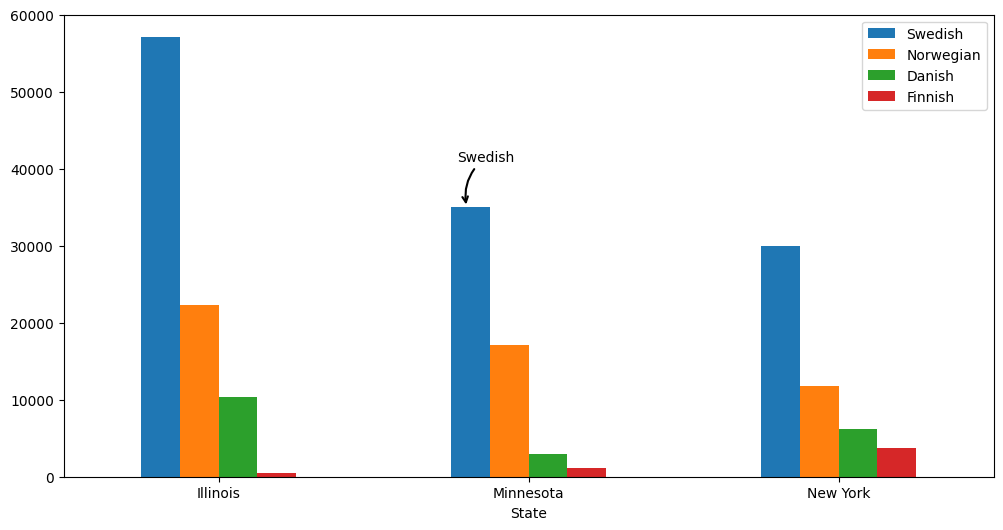

In [708]:
fig, ax = nordic_t3n_plot()

arrowprops = dict(arrowstyle = "->", linewidth=1.5, connectionstyle= "arc3, rad=0.3")
ax.annotate(text = "Swedish", xy = (0.80,35000), arrowprops=arrowprops, xytext=(0.77,41000))

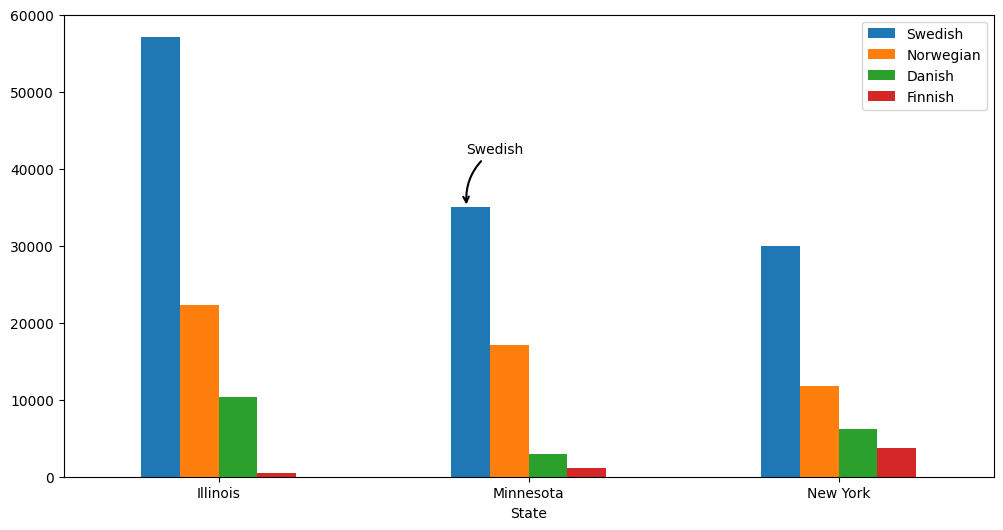

In [710]:
fig, ax = nordic_t3n_plot()

def annotate_nordic(text, xy, x_offset, y_offset):
    arrowprops = dict(arrowstyle = "->", linewidth=1.5, connectionstyle= "arc3, rad=0.3")
    ax.annotate(text = text, xy = xy, arrowprops=arrowprops, xytext = (xy[0] + x_offset, xy[1] + y_offset))

annotate_nordic("Swedish", (0.80,35000), 0, 7000)

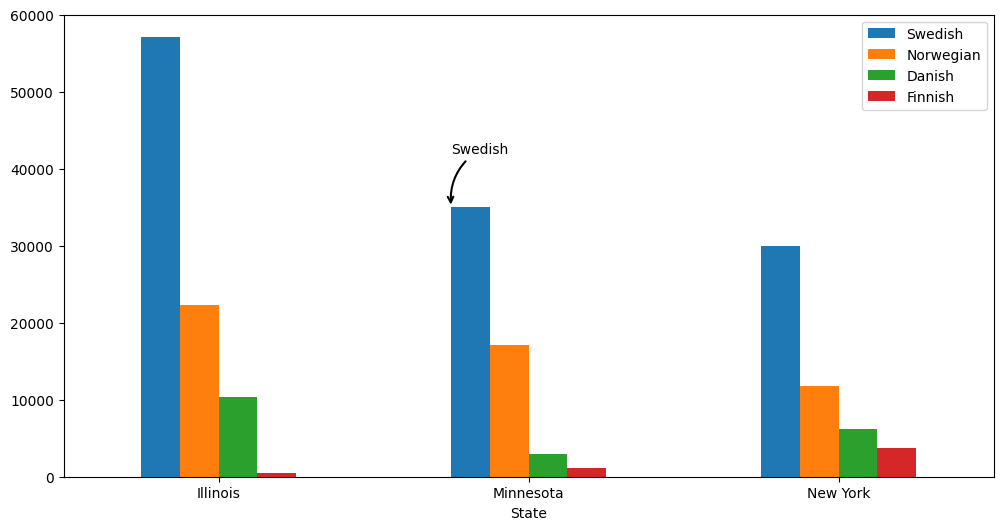

In [ ]:
fig, ax = nordic_t3n_plot()

def annotate_nordic(bar_artist, text, x_offset, y_offset):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    arrowprops = dict(arrowstyle = "->", linewidth=1.5, connectionstyle= "arc3, rad=0.3")
    ax.annotate(text = text, xy = xy, arrowprops=arrowprops, xytext = (xy[0] + x_offset, xy[1] + y_offset))

annotate_nordic(ax.containers[0][1], "Swedish", 0, 7000)

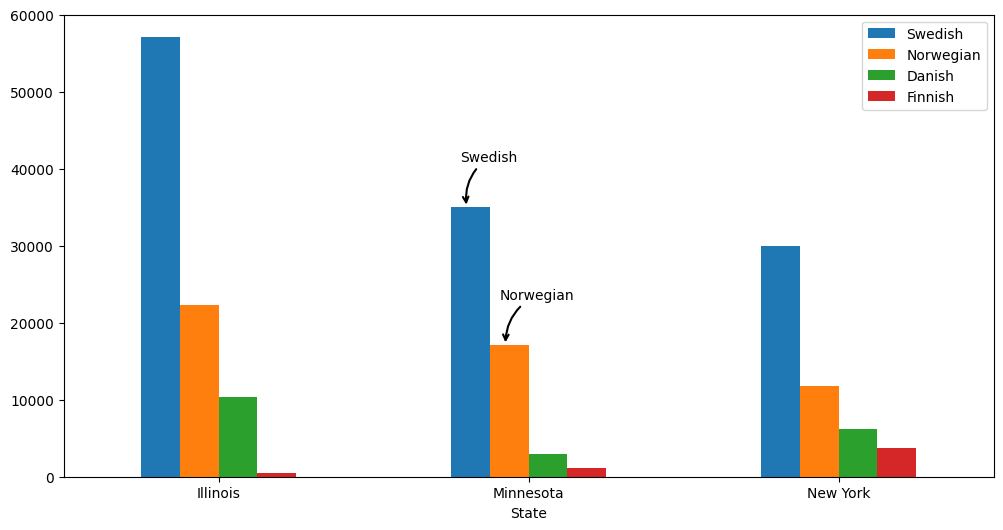

In [729]:
fig, ax = nordic_t3n_plot()

# tuple unpacking of ax.containers that is a list of four bar containers
swedish_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset, y_offset):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    arrowprops = dict(arrowstyle="->", linewidth=1.5, connectionstyle="arc3, rad=0.3")
    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        arrowprops=arrowprops,
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
    )


annotate_nordic(swedish_bars[1], "Swedish", 0.03, 6000)
annotate_nordic(norwegian_bars[1], "Norwegian", 0.03, 6000)

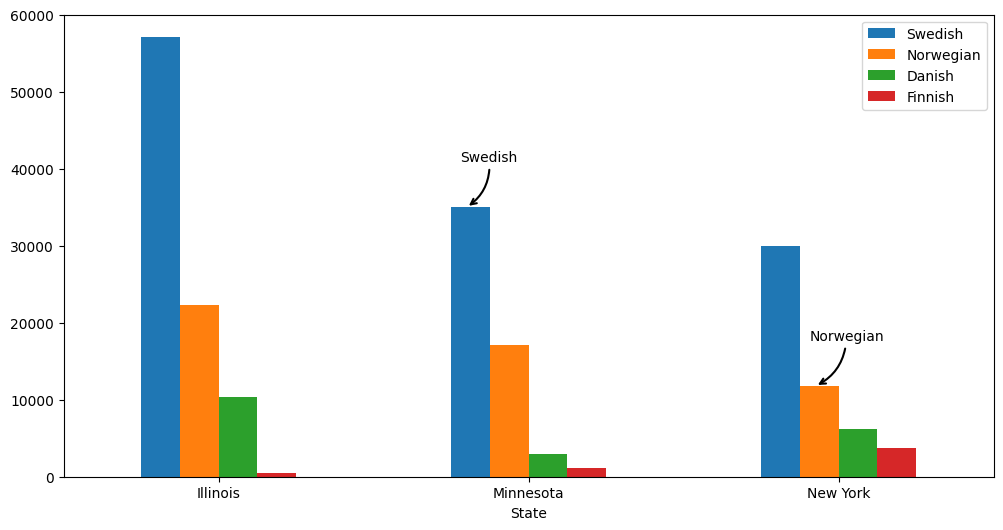

In [ ]:
fig, ax = nordic_t3n_plot()

def annotate_nordic(bar_artist, text, x_offset, y_offset):

    xy = (bar_artist.get_x(), bar_artist.get_height())


    # ternary if statement
    rad = 0.3 if xy[0] < 0 else -0.3

    arrowprops = dict(arrowstyle="->", linewidth=1.5, connectionstyle=f"arc3, rad={rad}")
    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        arrowprops=arrowprops,
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
    )


annotate_nordic(swedish_bars[1], "Swedish", 0.03, 6000)
annotate_nordic(norwegian_bars[2], "Norwegian", 0.03, 6000)

In [ ]:
# TO-DO for reader:

# draw other annotations
# remove legend
# save figure